In [0]:
#importing libraries
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline
image = cv2.imread('Q1.jpg')
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#plt.imshow(RGB_img)

In [0]:
# Convert to gray Scale
gray = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY) 
# Normalize the Image
gray = gray.astype("float32")/255
# plt.imshow(gray ,cmap = 'gray')
# plt.show()

In [0]:
#Intialise three Filters
l1_filter = np.zeros((2,3,3))
#Assignining Filter Values
##horizontal edge
l1_filter[0::] = [[-1,-2,-1],
                  [0,0,0],
                  [1,2,1]]
##vertical edge detection
l1_filter[1::] = [[-1,0,1],
                  [-2,0,2],
                  [-1,0,1]]

In [0]:
#Printing Filter values.
print(l1_filter[0])
print(l1_filter[1])

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


In [0]:
#Convolutional layer
class ModelLayer(nn.Module):
  def __init__(self,weight):
    super(ModelLayer,self).__init__()
    num_filters = 2
    #input size = 1 since grayscale image depth is 1
    #output size = num_filters
    self.conv = nn.Conv2d(1, num_filters, kernel_size=(3, 3), bias=False)
    self.conv.weight = torch.nn.Parameter(weight)
    # define a maxpooling layer of size 2x2 and a stride of 2
    self.pool = nn.MaxPool2d(2, 2)
  
  #Feed Forward function
  def forward(self, x):
    conv_x = self.conv(x)
    activated_x = F.relu(conv_x)
    pooled_x = self.pool(activated_x)
    return conv_x, activated_x, pooled_x


In [0]:
#instantiate the model and setting the weights to be those from our pre- defined filters
weight = torch.from_numpy(l1_filter).unsqueeze(1).type(torch.FloatTensor)
model = ModelLayer(weight)

In [0]:
# printing Model
print(model)

ModelLayer(
  (conv): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


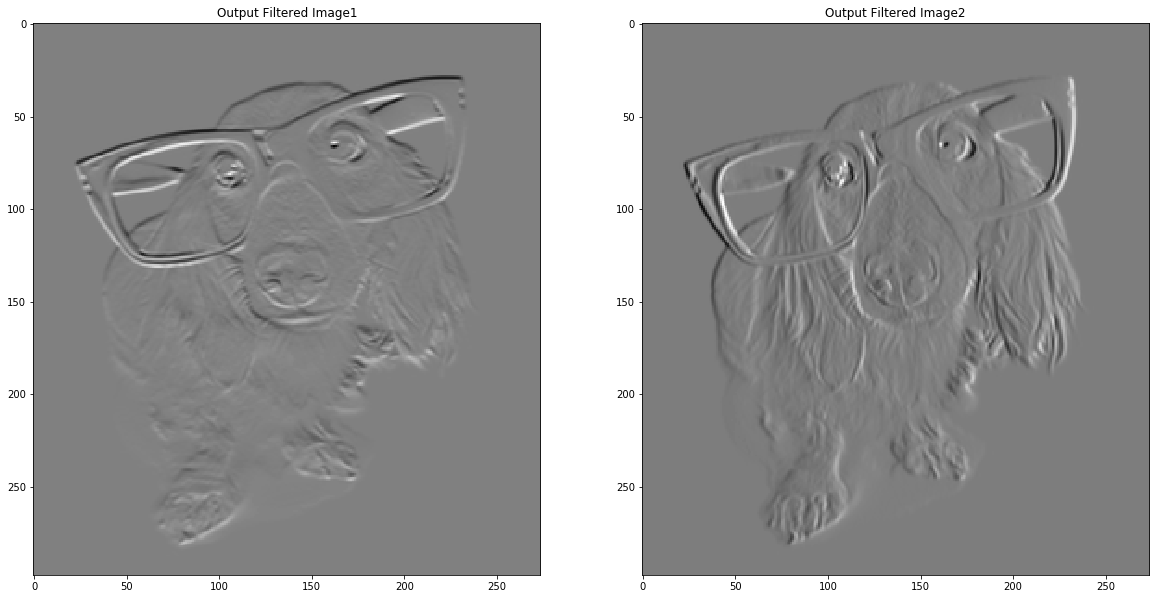

In [0]:
#Plotting filters
def filter_visualizer(filters):
    n_filters = len(filters)
    fig = plt.figure(figsize=(12, 6))
    fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i], cmap='gray')
        ax.set_title('Filter %s' % str(i+1))
#function to visualize layers
def layer_visualizer(layer, n_filters= 2):
    fig = plt.figure(figsize=(20, 20))
    for i in range(n_filters):
        axis = fig.add_subplot(1, n_filters, i+1)
        # grab layer outputs
        axis.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        axis.set_title('Output Filtered Image%s' % str(i+1))
# Grayscale image --> input Tensor
gray_img_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1)
convolutional_layer, ReLU_activated_convolutional_layer, pooled_layer = model(gray_img_tensor)
# visualizations:
## Convolution Layer
layer_visualizer(convolutional_layer)

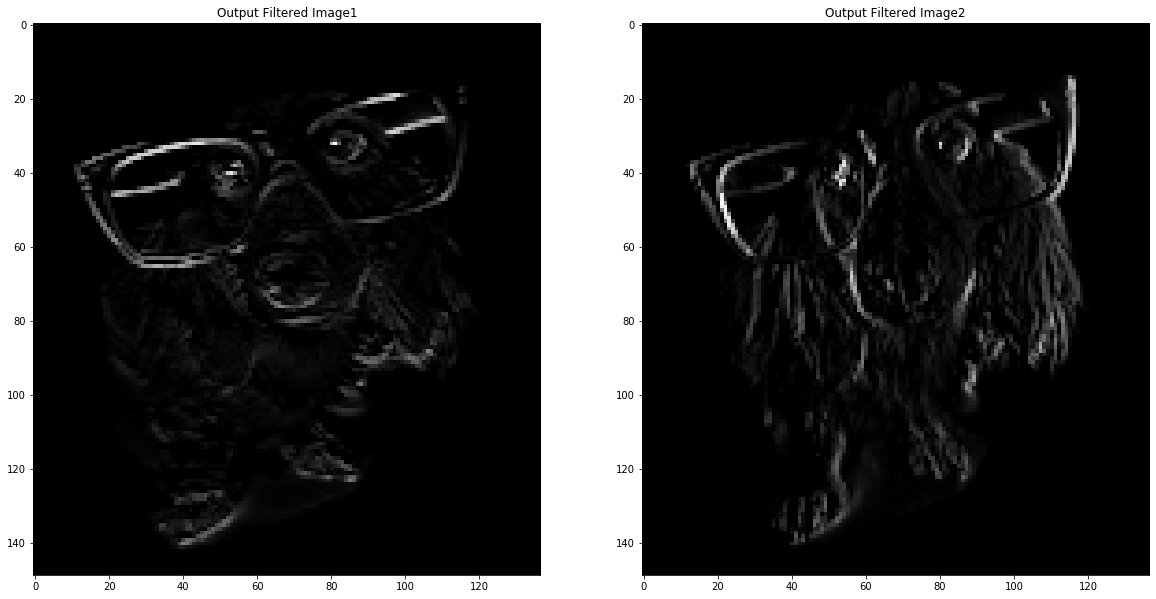

In [0]:
#Pooled layer
layer_visualizer(pooled_layer)

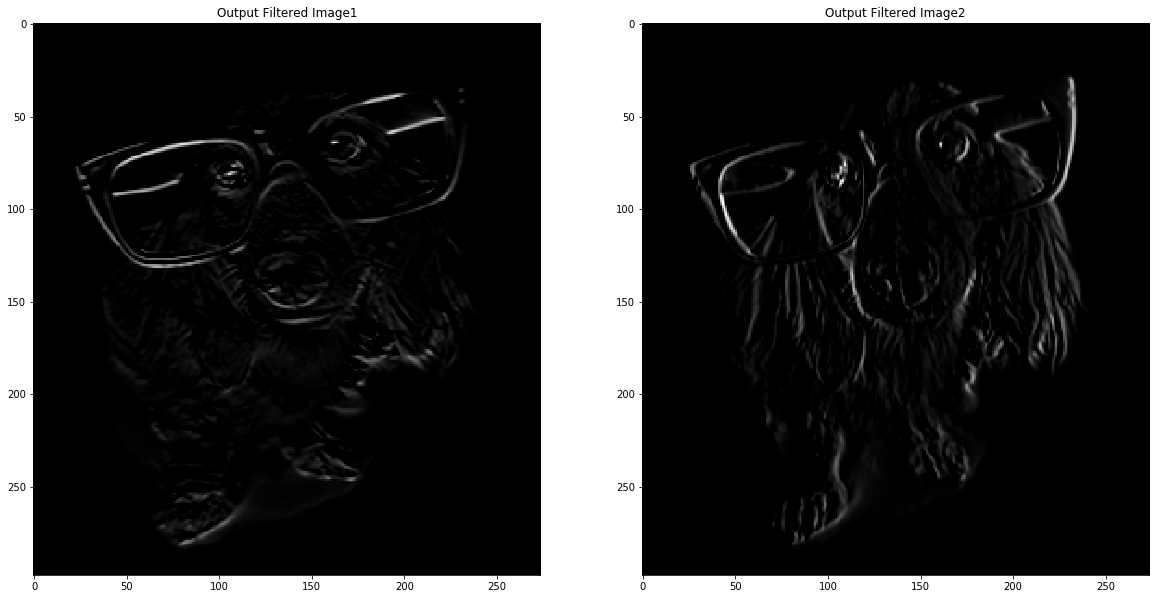

In [0]:
# *Activated* convolutional layer
layer_visualizer(ReLU_activated_convolutional_layer)